<a href="https://colab.research.google.com/github/IvRodco/EstadisticaAplicasa_1899843/blob/main/Sesion18_G41_2oct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estadistica Aplicada
##Sesion 18, 2 de octubre
###Ivanna Lizeth Rodriguez Ambriz
###1899843
G41

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [31]:
#importamos libreria especializada
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
#configurar tamaño de grafica
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['axes.labelsize']=12

In [5]:
#importamos los datos
pasajeros=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv', index_col='Month', parse_dates=True)

In [6]:
#verificamos que se importo bien
pasajeros.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


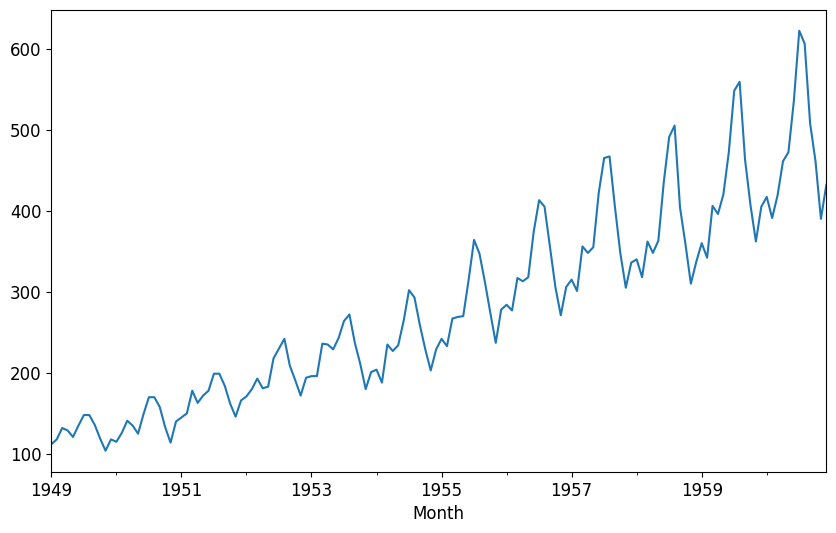

In [7]:
#graficamos
pasajeros['Thousands of Passengers'].plot();

In [26]:
#calculamos promedio movil simple a 12 meses
pasajeros['PMS-12']=pasajeros['Thousands of Passengers'].rolling(12).mean()

In [24]:
#promedio movil centrado (impar) a 11 meses
pasajeros['PMC-11']=pasajeros['Thousands of Passengers'].rolling(11,center=True).mean()

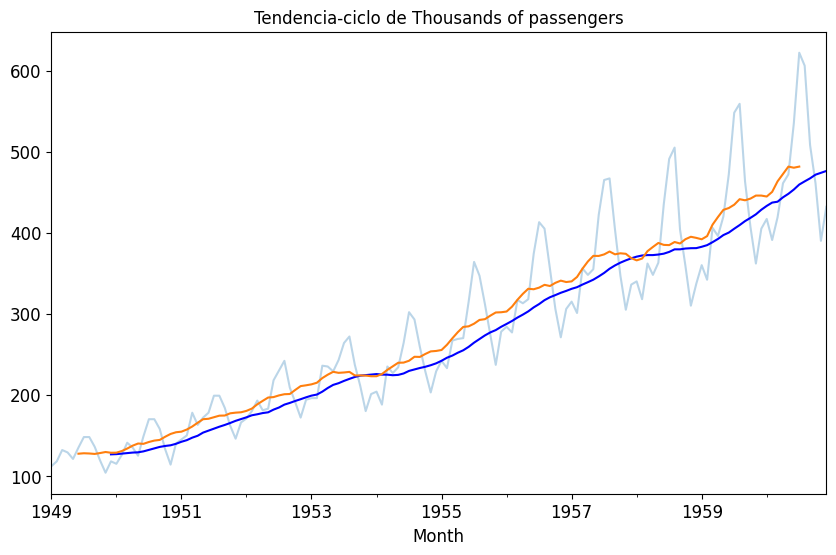

In [25]:
#el promedio movil es una forma de traer la tendencia-ciclo

#graficamos serie original vs PMS-12, PMC-11
pasajeros['Thousands of Passengers'].plot(alpha=0.3)
pasajeros['PMS-12'].plot(color='blue')
pasajeros['PMC-11'].plot()
plt.title('Tendencia-ciclo de Thousands of passengers');

In [27]:
#suavizamiento exponencial doble (exponential weight moving average)
#PMS-Ponderado exponencialmente
pasajeros['SE']=pasajeros['Thousands of Passengers'].ewm(span=12,adjust=False).mean()

In [28]:
#metodologia Holt-Winters
#suavizamiento exponencial doble

#primero revisamos la informacion de los datos
pasajeros.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [30]:
#asignamos frecuencia a los datos

#en este caso aplicamos frecuencia mansual (es de acuerdo a los datos)
pasajeros=pasajeros.asfreq('MS')
pasajeros.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

Generalmente para utilizar una serie de tiempo debe haber una variable de fecha y debe tener una frecuencia asignada

In [ ]:
##ahora si hacemos el suavisamiento exponencial doble

#con el promedio movil se suaviza la serie original -> 1
#con el sed se suaviza la tendencia con ayuda del PMS -> 2

pasajeros['SED']=ExponentialSmoothing(pasajeros['Thousands of Passengers'],trend='mult')